##【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。
サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [ ]:
import numpy as np
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
small_board_ndarray = np.array(small_board_list)
small_board_shape = np.reshape(small_board_ndarray,(2,2))
print(small_board_shape)

[[1 2]
 [4 8]]


##【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [ ]:
import numpy as np


def chess_board(n,m):
  board=[1]
  for _  in range(n*m-1):
    board.append(2*board[-1])
    board_ndarray = np.array(board)
  return board_ndarray 


chbo = chess_board(8,8)
np.set_printoptions(formatter={'float': '{:.0f}'.format}) #　+e を表示しなくする
print(chbo)

[1 2 4 8 16 32 64 128 256 512 1024 2048 4096 8192 16384 32768 65536 131072
 262144 524288 1048576 2097152 4194304 8388608 16777216 33554432 67108864
 134217728 268435456 536870912 1073741824 2147483648 4294967296 8589934592
 17179869184 34359738368 68719476736 137438953472 274877906944
 549755813888 1099511627776 2199023255552 4398046511104 8796093022208
 17592186044416 35184372088832 70368744177664 140737488355328
 281474976710656 562949953421312 1125899906842624 2251799813685248
 4503599627370496 9007199254740992 18014398509481984 36028797018963968
 72057594037927936 144115188075855872 288230376151711744
 576460752303423488 1152921504606846976 2305843009213693952
 4611686018427387904 9223372036854775808]


## 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

合計は18446744073709551616粒


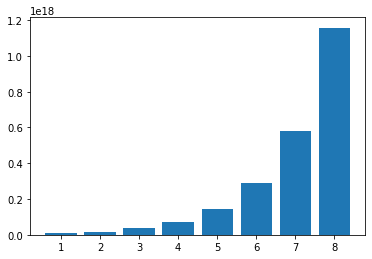

In [ ]:
small_board_shape = np.reshape(small_board_ndarray,(8,8)) #8列8行
small_board_mean = np.mean(small_board_shape,axis=0) #列ごとに平均
print("合計は{:.0f}粒".format(np.sum(small_board_ndarray))) #合計


%matplotlib inline
left = np.arange(len(small_board_mean)) #グラフの横軸(X軸)
height = small_board_mean #Y軸の高さ
label = ["1","2","3","4","5","6","7","8"]
plt.bar(left,height,tick_label=label)
plt.show()

##【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。

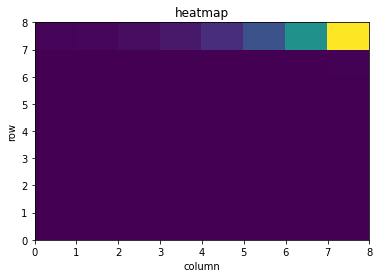

In [ ]:
height = small_board_ndarray  #np.array
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(height.reshape(8,8))
plt.show() 
#値が小さいところが紫、大きいところが黄色
#紫多すぎないか?

##【問題5】後半は前半の何
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [ ]:
# all = np.sum(small_board_shape,axis=1) #小麦の行ごとの合計数
first_half = np.sum(small_board_shape[:4],axis=1) #行ごとにある前半の小麦の合計
second_half = np.sum(small_board_shape[4:],axis=1) #行ごとにある後半の小麦の合計

first = np.sum(first_half) #前半の小麦の総合計
second = np.sum(second_half) #後半の小麦の総合計
what_times = second // first #何倍か
print("後半にある小麦は前半の{:.0f}倍".format(what_times))

後半にある小麦は前半の4294967296倍


##【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。
それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。



####np.append()の場合

In [ ]:
n_squares = 64
board = np.array([1]).astype(np.uint64)
for _ in range(n_squares - 1):
  board = np.append(board,2*board[-1])
print(board)

[1 2 4 8 16 32 64 128 256 512 1024 2048 4096 8192 16384 32768 65536 131072
 262144 524288 1048576 2097152 4194304 8388608 16777216 33554432 67108864
 134217728 268435456 536870912 1073741824 2147483648 4294967296 8589934592
 17179869184 34359738368 68719476736 137438953472 274877906944
 549755813888 1099511627776 2199023255552 4398046511104 8796093022208
 17592186044416 35184372088832 70368744177664 140737488355328
 281474976710656 562949953421312 1125899906842624 2251799813685248
 4503599627370496 9007199254740992 18014398509481984 36028797018963968
 72057594037927936 144115188075855872 288230376151711744
 576460752303423488 1152921504606846976 2305843009213693952
 4611686018427387904 9223372036854775808]


####ブロードキャストの場合

In [ ]:

indices = np.arange(n_squares).astype(np.uint64)
board = 2**indices
print(board)

[                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      70368744177664     140737488355328
     281474976710656    

##【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。
%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

####np.array()の場合

In [ ]:
%%timeit
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
small_board_ndarray = np.array(small_board_list)

100000 loops, best of 3: 15.8 µs per loop


####np.append()の場合

In [ ]:
%%timeit
board = np.array([1]).astype(np.uint64)
for _ in range(n_squares - 1):
  board = np.append(board,2*board[-1])

1000 loops, best of 3: 547 µs per loop


####ブロードキャストの場合

In [ ]:
%%timeit
indices = np.arange(n_squares).astype(np.uint64)
board = 2**indices

The slowest run took 63.11 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.9 µs per loop


##考察
一番早いのはブロードキャストで、一番遅いのはnp.append()であった。
やっぱりfor文を使い配列を結合させ更新をしているせいで遅いのでは？
